# Convolutions in Image Processing 

In [1]:
#Import certain libraries
import matplotlib.image as mpimg
import os
import urllib
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Pick some image. This could be from local machine or the web.
response = requests.get("https://i.ytimg.com/vi/SfLV8hD7zX4/maxresdefault.jpg")
img = Image.open(BytesIO(response.content))

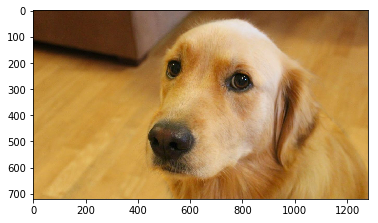

In [3]:
plt.imshow(img)
plt.show()

A digital image is usually represented as a 3D-matrix of pixels. 2 dimensions represent the height and width of the image and the third dimension is for colour: usually Red-Green-Blue, though there are other colour systems as well like RYB, CYMK

In [4]:
#Visualize the image as array
image = np.array(img)

In [5]:
#Dimensions of the image-array
image.shape

(720, 1280, 3)

Slicing the images. Check what slicing images does. Below, we have sliced the image matrix along the 3rd dimension to retain only the middle layer.

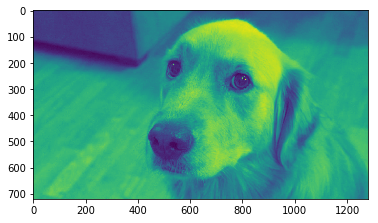

In [6]:
image_slice = image[:,:,1]

plt.imshow(image_slice)
plt.show()

In [53]:
#Smells fishy? Try out some slicing
image_slice = image[300:900,200:800,:]

plt.imshow(image_slice)
plt.show()

## Kernels 

Kernels are small sliding windows that would be repeatedly applied over the image. Usually these were hand-crafted in earlier times for image processing. They could be used to blur, sharpen, detect edges or certain features. With the following:


$$kernel = \begin{bmatrix}
    1 & 1 & 1 \\
    0 & 0 & 0 \\
    -1 & -1 & -1 \\
\end{bmatrix}$$

an 'activation' is seen when a horizontal edge is visited.

In [7]:
kernel = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

In [9]:
image_hEdge = np.zeros(image_slice.shape)

In [10]:
image_hEdge.shape

(720, 1280)

In [11]:
for i in range(1, image_slice.shape[0]-1):
    for j in range(1, image_slice.shape[1]-1):
        image_hEdge[i][j] = np.sum(np.multiply(image_slice[i-1:i+2,j-1:j+2],kernel))

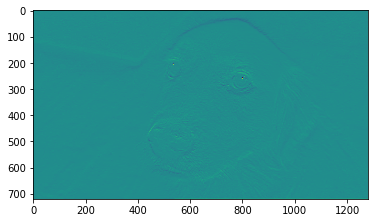

In [12]:
plt.imshow(image_hEdge)
plt.show()